In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib Inline

In [2]:
df = pd.read_csv('data/Placement_Data_Full_Class.csv')

In [3]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [4]:
df.shape

(215, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [6]:
df.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [7]:
#Check for duplicates
idsUnique = len(set(df.sl_no ))
idsTotal = df.shape[0]
idsDupli = idsTotal - idsUnique
print("There are " + str(idsDupli) + " duplicate IDs for " + str(idsTotal) + " total entries")

There are 0 duplicate IDs for 215 total entries


In [8]:
df_copy = df.copy()

# 1. EDA 

## 1.1 Univariet Analysis

In [9]:
#AS target variable is object we convert to int so replace the value
df_copy['status'].replace('Not Placed',0,inplace=True)
df_copy['status'].replace('Placed',1,inplace=True)

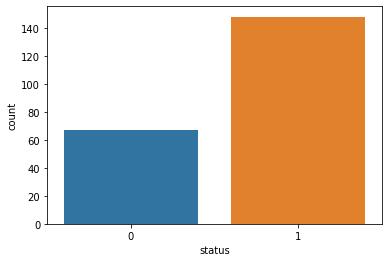

In [10]:
sns.countplot(df_copy['status'])

### 1.2 Numerical Variable

In [11]:
numeric_features = df_copy.select_dtypes(include=[np.number])
numeric_features.head()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,status,salary
0,1,67.00,91.00,58.00,55.0,58.80,1,270000.0
1,2,79.33,78.33,77.48,86.5,66.28,1,200000.0
2,3,65.00,68.00,64.00,75.0,57.80,1,250000.0
3,4,56.00,52.00,52.00,66.0,59.43,0,NaN
4,5,85.80,73.60,73.30,96.8,55.50,1,425000.0


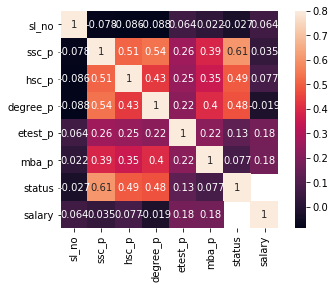

In [12]:
corr =numeric_features.corr()
sns.heatmap(corr, vmax=.8, square=True,annot=True);

In [13]:
df_copy = df_copy.drop(['sl_no'], axis = 1)

### 1.1.3. Categorical Predictors

In [14]:
cat_features = df_copy.select_dtypes(include=[np.object])
cat_features.head()

,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation
0,M,Others,Others,Commerce,Sci&Tech,No,Mkt&HR
1,M,Central,Others,Science,Sci&Tech,Yes,Mkt&Fin
2,M,Central,Central,Arts,Comm&Mgmt,No,Mkt&Fin
3,M,Central,Central,Science,Sci&Tech,No,Mkt&HR
4,M,Central,Central,Commerce,Comm&Mgmt,No,Mkt&Fin


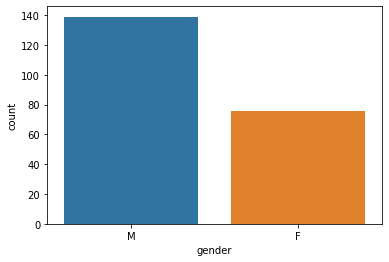

In [15]:
sns.countplot(df_copy.gender)

###### Here i concluded that male student have got more placement than female

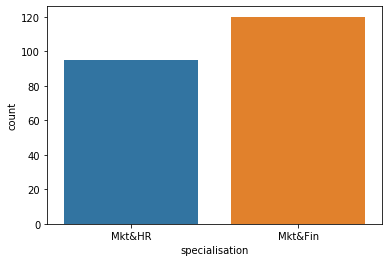

In [16]:
sns.countplot(df_copy.specialisation)

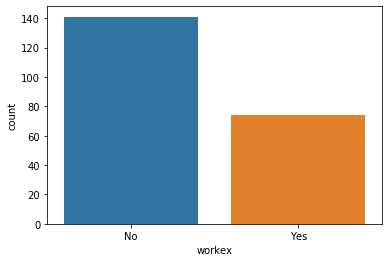

In [17]:
sns.countplot(df_copy.workex)

##### Here it show a vary nice that more no exp student got placed than experienced

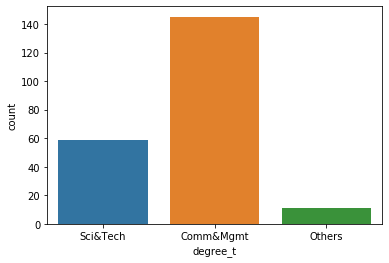

In [18]:
sns.countplot(df_copy.degree_t)

### 2. 2. Data Pre-Processing

#### 2. 1. Looking for missing values

In [19]:
df_copy.isnull().sum()

gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [20]:
df_copy['salary'] = df_copy['salary'].fillna(df_copy['salary'].median())

In [21]:
df_copy.isnull().sum()

gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

### Categorical Variables

In [22]:
cat_features = df_copy.select_dtypes(include=[np.object])
cat_features.head()

,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation
0,M,Others,Others,Commerce,Sci&Tech,No,Mkt&HR
1,M,Central,Others,Science,Sci&Tech,Yes,Mkt&Fin
2,M,Central,Central,Arts,Comm&Mgmt,No,Mkt&Fin
3,M,Central,Central,Science,Sci&Tech,No,Mkt&HR
4,M,Central,Central,Commerce,Comm&Mgmt,No,Mkt&Fin


In [23]:
df_copy['ssc_b'].value_counts()

Central    116
Others      99
Name: ssc_b, dtype: int64

In [24]:
df_copy['hsc_b'].value_counts()

Others     131
Central     84
Name: hsc_b, dtype: int64

In [25]:
df_copy['hsc_s'].value_counts()

Commerce    113
Science      91
Arts         11
Name: hsc_s, dtype: int64

In [26]:
df_copy['specialisation'].value_counts()

Mkt&Fin    120
Mkt&HR      95
Name: specialisation, dtype: int64

In [27]:
df_copy['gender'] = df_copy['gender'].replace(("M", "F"),(0,1))
df_copy['ssc_b'] = df_copy['ssc_b'].replace(("Central", "Others"),(0,1))
df_copy['hsc_b'] = df_copy['hsc_b'].replace(("Others", "Central"),(0,1))
df_copy['hsc_s'] = df_copy['hsc_s'].replace(("Commerce", "Science","Arts"),(1,2,3))
df_copy['degree_t'] = df_copy['degree_t'].replace(("Comm&Mgmt", "Sci&Tech","Others"),(3,2,1))
df_copy['workex'] = df_copy['workex'].replace(("No", "Yes"),(0,1))
df_copy['specialisation'] = df_copy['specialisation'].replace(("Mkt&Fin", "Mkt&HR"),(2,1))

In [28]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    int64  
 1   ssc_p           215 non-null    float64
 2   ssc_b           215 non-null    int64  
 3   hsc_p           215 non-null    float64
 4   hsc_b           215 non-null    int64  
 5   hsc_s           215 non-null    int64  
 6   degree_p        215 non-null    float64
 7   degree_t        215 non-null    int64  
 8   workex          215 non-null    int64  
 9   etest_p         215 non-null    float64
 10  specialisation  215 non-null    int64  
 11  mba_p           215 non-null    float64
 12  status          215 non-null    int64  
 13  salary          215 non-null    float64
dtypes: float64(6), int64(8)
memory usage: 23.6 KB


In [29]:
df_copy.describe()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,0.353488,67.303395,0.460465,66.333163,0.390698,1.525581,66.370186,2.623256,0.344186,72.100558,1.558140,62.278186,0.688372,281283.720930
std,0.479168,10.827205,0.499598,10.897509,0.489045,0.594403,7.358743,0.581987,0.476211,13.275956,0.497767,5.833385,0.464240,78232.510303
min,0.000000,40.890000,0.000000,37.000000,0.000000,1.000000,50.000000,1.000000,0.000000,50.000000,1.000000,51.210000,0.000000,200000.000000
25%,0.000000,60.600000,0.000000,60.900000,0.000000,1.000000,61.000000,2.000000,0.000000,60.000000,1.000000,57.945000,0.000000,250000.000000
50%,0.000000,67.000000,0.000000,65.000000,0.000000,1.000000,66.000000,3.000000,0.000000,71.000000,2.000000,62.000000,1.000000,265000.000000
75%,1.000000,75.700000,1.000000,73.000000,1.000000,2.000000,72.000000,3.000000,1.000000,83.500000,2.000000,66.255000,1.000000,282500.000000
max,1.000000,89.400000,1.000000,97.700000,1.000000,3.000000,91.000000,3.000000,1.000000,98.000000,2.000000,77.890000,1.000000,940000.000000


In [30]:
df_copy.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,0,67.00,1,91.00,0,1,58.00,2,0,55.0,1,58.80,1,270000.0
1,0,79.33,0,78.33,0,2,77.48,2,1,86.5,2,66.28,1,200000.0
2,0,65.00,0,68.00,1,3,64.00,3,0,75.0,2,57.80,1,250000.0
3,0,56.00,0,52.00,1,2,52.00,2,0,66.0,1,59.43,0,265000.0
4,0,85.80,0,73.60,1,1,73.30,3,0,96.8,2,55.50,1,425000.0


In [31]:
df_copy.to_csv("data/data_cleaned.csv",index=False)